In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/team-project/파이널프로젝트_RAW_210329_210926.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [ ]:
df.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


In [ ]:
df.describe(include=['O'])

,type,state,course_title,category_title,format,coupon_title,pg,method,subcategory_title
count,105419,105419,105403,105395,105403,31817,90344,92323,85590
unique,4,5,1641,16,16,494,5,9,33
top,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,INICIS,CARD,영상 편집
freq,61433,62763,3257,34430,87402,5498,60087,66380,7312


In [ ]:
df.head(20)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
5,970655,478028.0,201797.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,NaN,NaN,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
6,970614,477910.0,NaN,ORDER,CANCELLED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 15:22:36,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
7,970664,460730.0,200622.0,ORDER,CANCELLED,올인원 패키지 : 기업가치 평가와 M&A 전략 실무,부동산/금융,올인원,2021-03-28 15:25:42,112500,NaN,NaN,122500.0,122500.0,NaN,CARD,금융/투자 실무,2019-05-02
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
9,970667,478033.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:48,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02


- payment = 고객 돈을 지불한 상태
- refund = 고객이 환불 받은 상태
- cancelled = 수강 신청 중 결제를 하지 않고 신청을 그만둔 상태(가정)


### 손실되고 있는 기회 비용


## 월별 수익
- 6월달부터 8월달까지 수익이 증가하는 것으로 판단 됨
- 6월부터 8월까지 프로모션등에 신경을 쓴다면 더 높은 수익을 얻을 수 있을 가능성이 있음

In [ ]:
pay = (df.type == 'PAYMENT')

In [ ]:
df_pay = df[pay]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


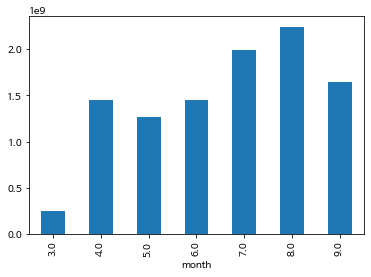

In [ ]:
df.date=df_pay.completed_at
df.date=pd.to_datetime(df.date, dayfirst=True)
df['month']=df.date.dt.month
df1=df.groupby('month')['transaction_amount'].sum()
df1.plot.bar()

## 월별 환불
전체적으로 3월을 제외한 모든 달의 환불된 돈이 많음
특히 4,5월 달은 수익이 다른 달에 비해 많이 나지 않음에도 상당히 환불된 금액이 많음 이를 방지할 수단이 필요할것으로 사료됨

In [ ]:
refund = (df.type == 'REFUND')
df_refund = df[refund]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


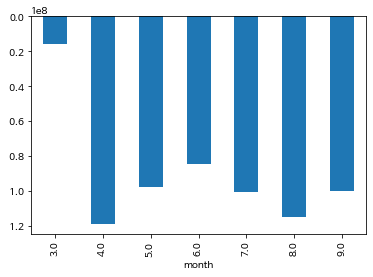

In [ ]:
df.date=df_refund.completed_at
df.date=pd.to_datetime(df.date, dayfirst=True)
df['month']=df.date.dt.month
df1=df.groupby('month')['transaction_amount'].sum()
df1.plot.bar()

## 월별 cancelled
- 결제 취소 또한 4,5월에 높은 것을보아 4,5월 달에 어떤 문제가 있었을지도 모른다는 추론이 가능

In [ ]:
cancelled = (df.state == 'CANCELLED')
df_cancelled = df[cancelled]

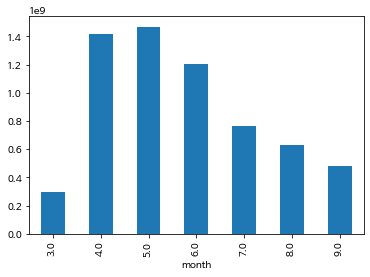

In [ ]:
df.date=df_cancelled.completed_at
df.date=pd.to_datetime(df.date, dayfirst=True)
df['month']=df.date.dt.month
df1=df.groupby('month')['transaction_amount'].sum()
df1.plot.bar()

## 수익에 따른 강의 순위
- 수익이 많이 나는 강의는 더욱 노출을 많이 시키고 수익이 많이 나지 않는 강의는 떄에 따라 폐기하는 것이 더 나을 수도 있다고 판단됨

In [ ]:
df_course=df_pay.groupby('course_title')['transaction_amount'].count()
df_course.plot.bar(figsize = (300, 300))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_course2=df_pay.groupby('course_title')['transaction_amount'].count().sort_values(ascending=False)
df_course2.plot.bar(figsize=(300,300))

Output hidden; open in https://colab.research.google.com to view.

## 환불 된  강의 순위
- 환불이 많은 강의는 그 이유를 파악하여 보완하는 것이 환불을 막고 로스를 줄일 수 있는 방법이라고 판단됨


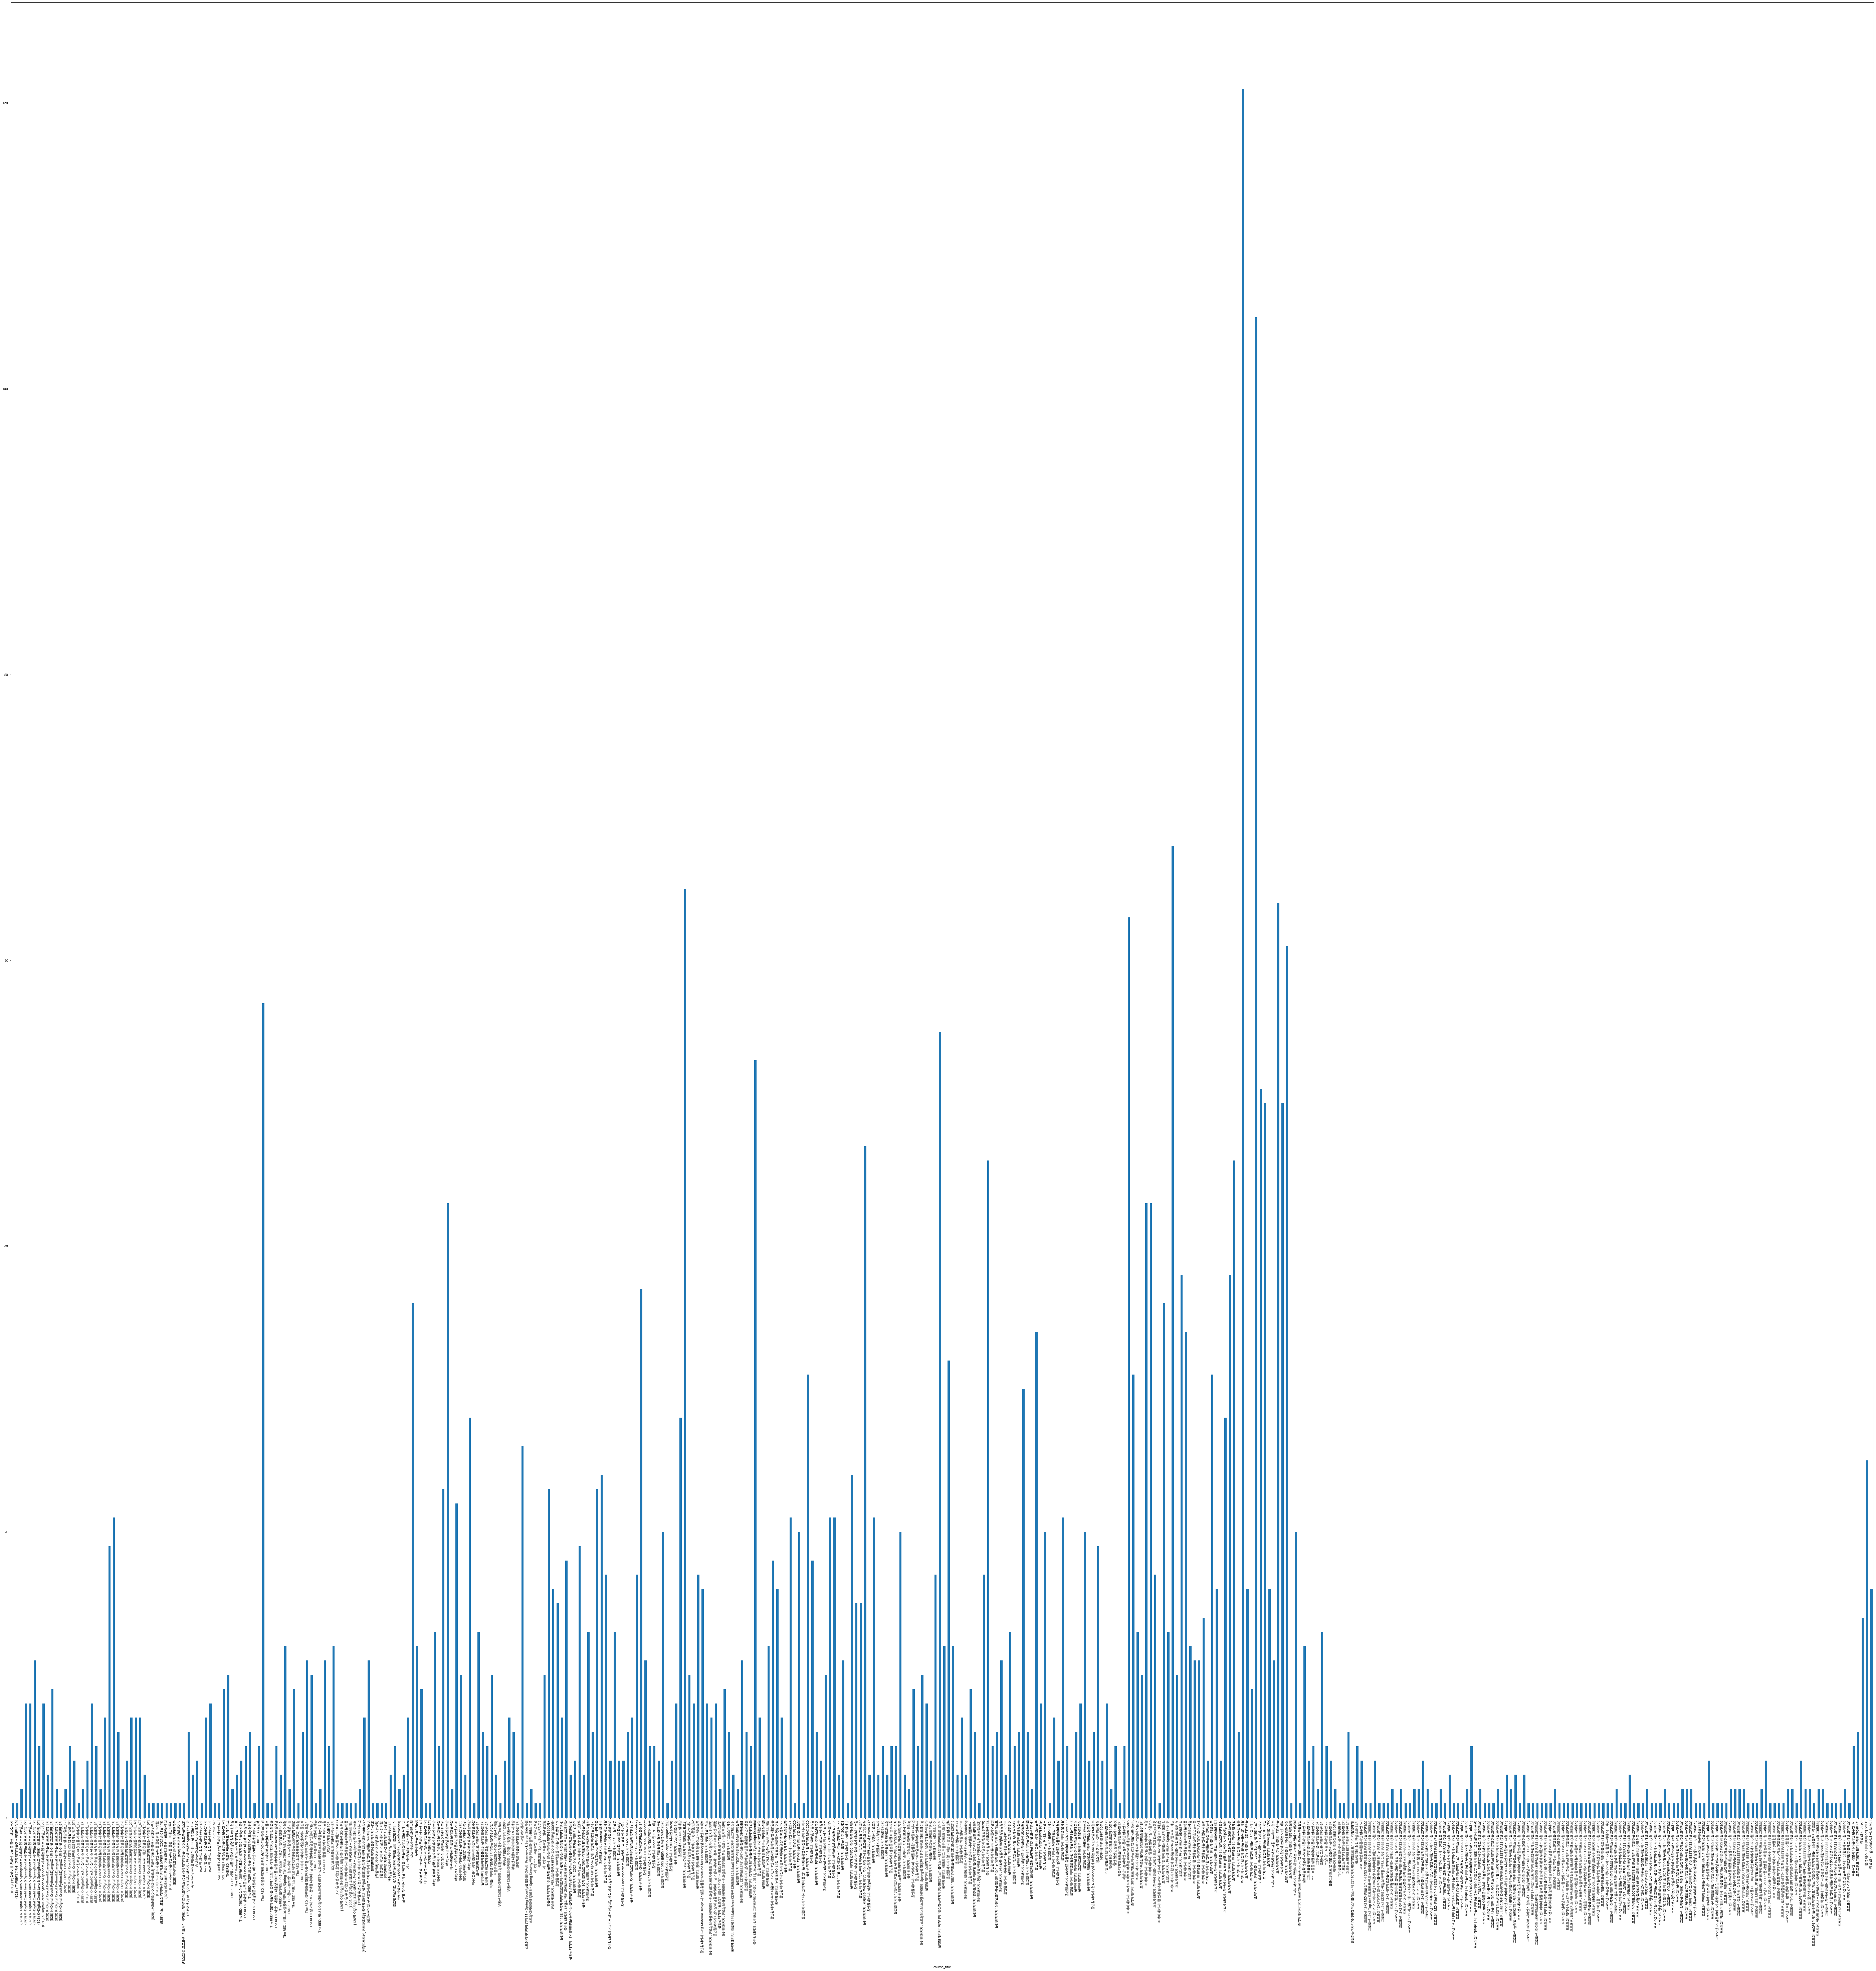

In [ ]:
df_course=df_refund.groupby('course_title')['transaction_amount'].count()
df_course.plot.bar(figsize = (100, 100))

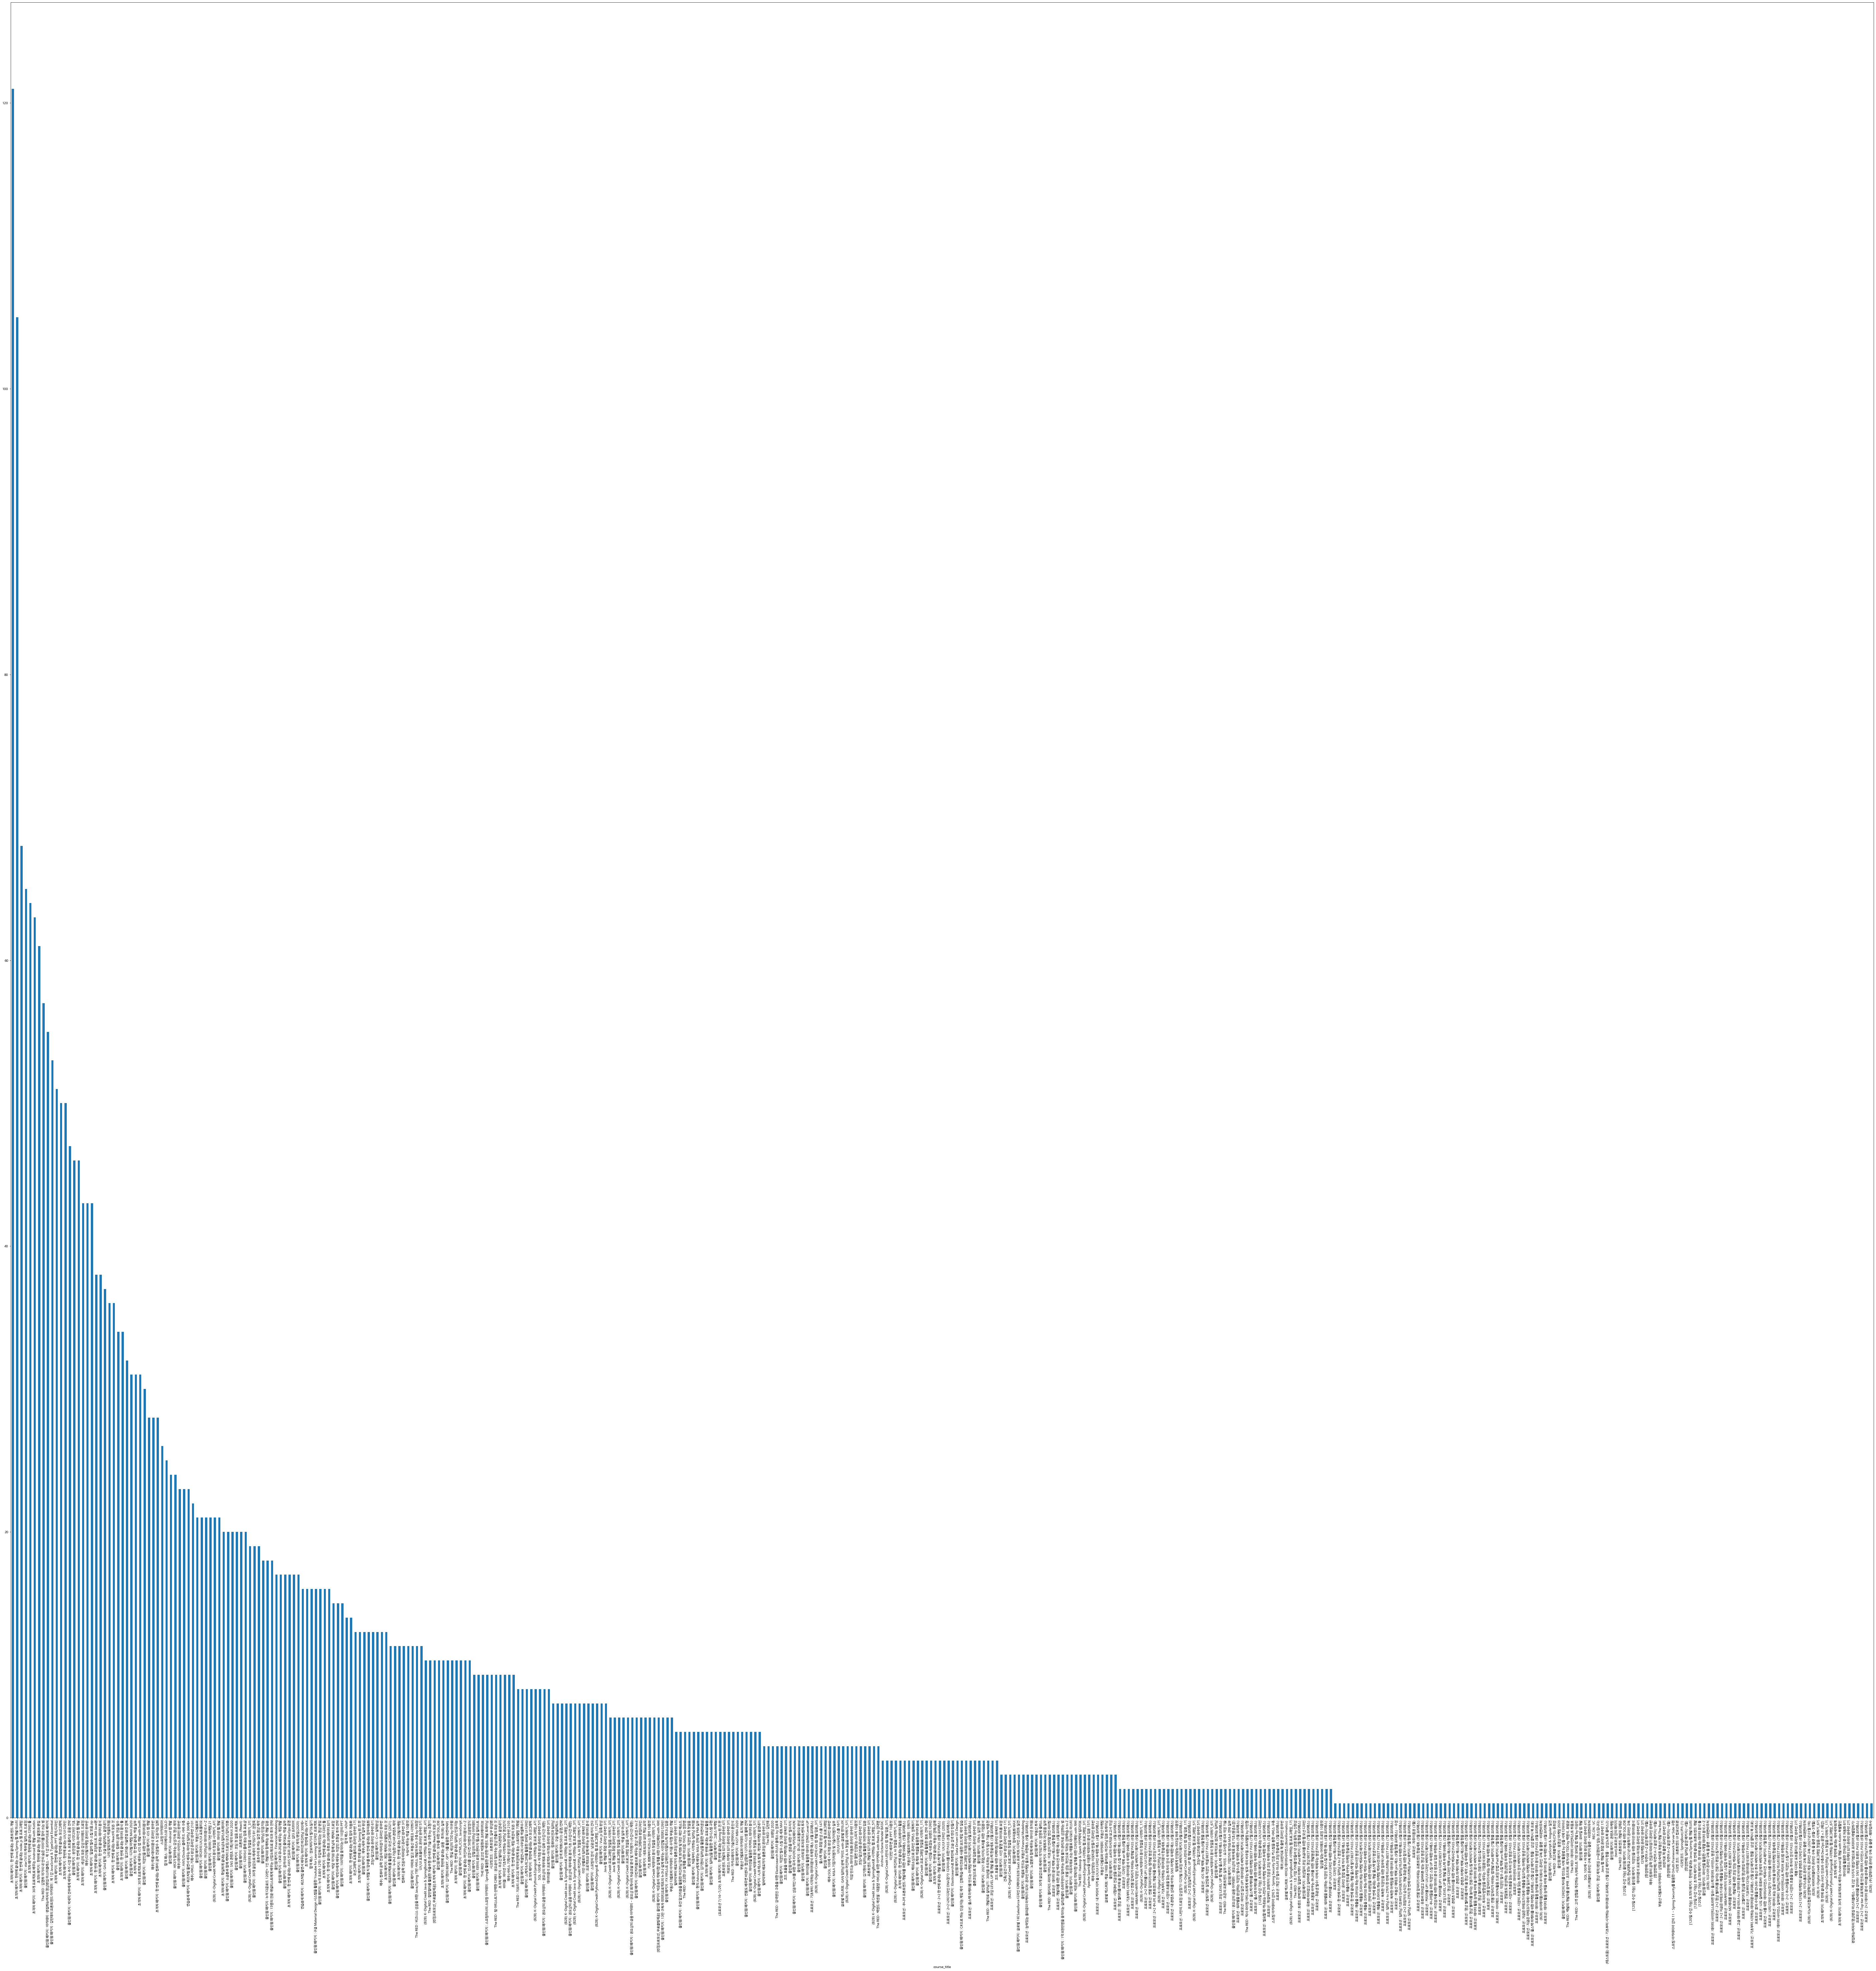

In [ ]:
df_course2=df_refund.groupby('course_title')['transaction_amount'].count().sort_values(ascending=False)
df_course2.plot.bar(figsize=(100,100))

## cancelled된 강의 순위
- 상당히 많은 강의가 cancelled 된 이유를 찾아야 기회손실을 줄일 수 있다고 생각됨


In [ ]:
df_course=df_cancelled.groupby('course_title')['transaction_amount'].count()
df_course.plot.bar(figsize = (150, 150))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_course2=df_cancelled.groupby('course_title')['transaction_amount'].count().sort_values(ascending=False)
df_course2.plot.bar(figsize=(150,150))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,month
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,3.0
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,3.0
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,NaN
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,3.0
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,NaN


## 수익이 많이 나온 카테고리 순
- 수익이 많이 나온 카테고리의 강의를 더 많이 개설하는 방법
- 수익이 많이 나지 않은 카테고리의 강의들을 보완하여 더 폭 넓은 사용자를 끌어들이는 방법.

In [ ]:
df_total = df_pay[['category_title', 'transaction_amount']].groupby(['category_title'], as_index=False).sum().sort_values(by='transaction_amount', ascending=False)

In [ ]:
df_total

,category_title,transaction_amount
14,프로그래밍,2316532720
3,데이터사이언스,1863136652
1,교육,1236457045
4,디자인,928835470
5,마케팅,921736900
8,업무 생산성,745277865
9,영상/3D,740806000
6,부동산/금융,604133525
11,크리에이티브,487600600
12,투자/재테크,404268000


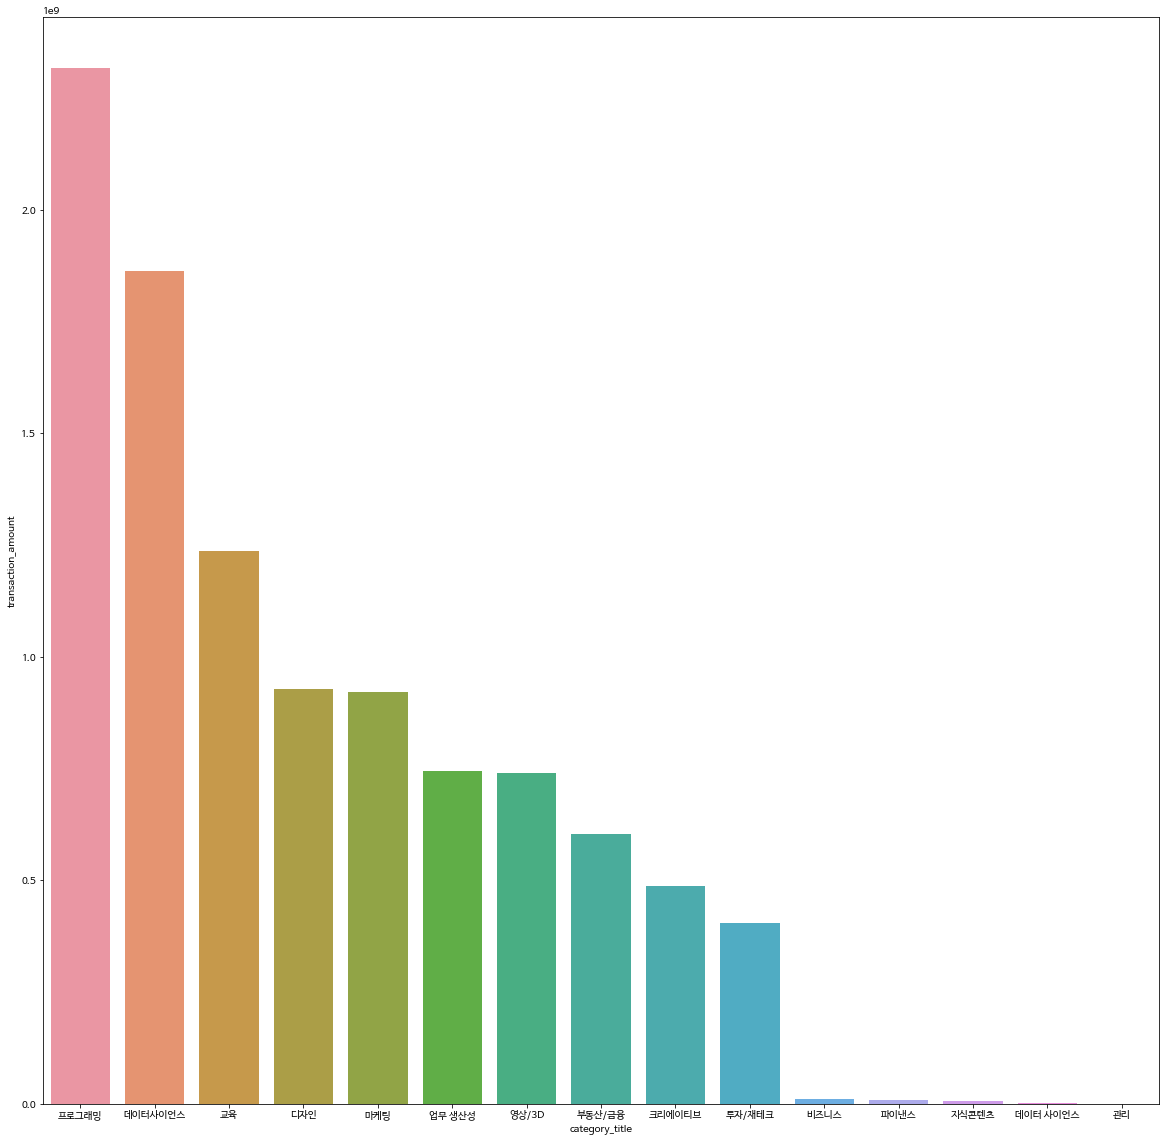

In [ ]:
plt.figure(figsize = (20,20))
sns.barplot(x='category_title', y='transaction_amount', data=df_total)

## 환불이 많이 나온 카테고리 순
- 환불이 많이 나온 카테고리들을 보완하여 로스를 줄여야 할 것

In [ ]:
df_total_refund = df_refund[['category_title', 'transaction_amount']].groupby(['category_title'], as_index=False).sum().sort_values(by='transaction_amount', ascending=False)

In [ ]:
df_total_refund

,category_title,transaction_amount
5,비즈니스,-660000
10,파이낸스,-660000
0,교육,-3100000
9,투자/재테크,-26842980
4,부동산/금융,-28484791
8,크리에이티브,-37372473
6,업무 생산성,-41901875
7,영상/3D,-46737195
2,디자인,-66463452
3,마케팅,-75983126


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


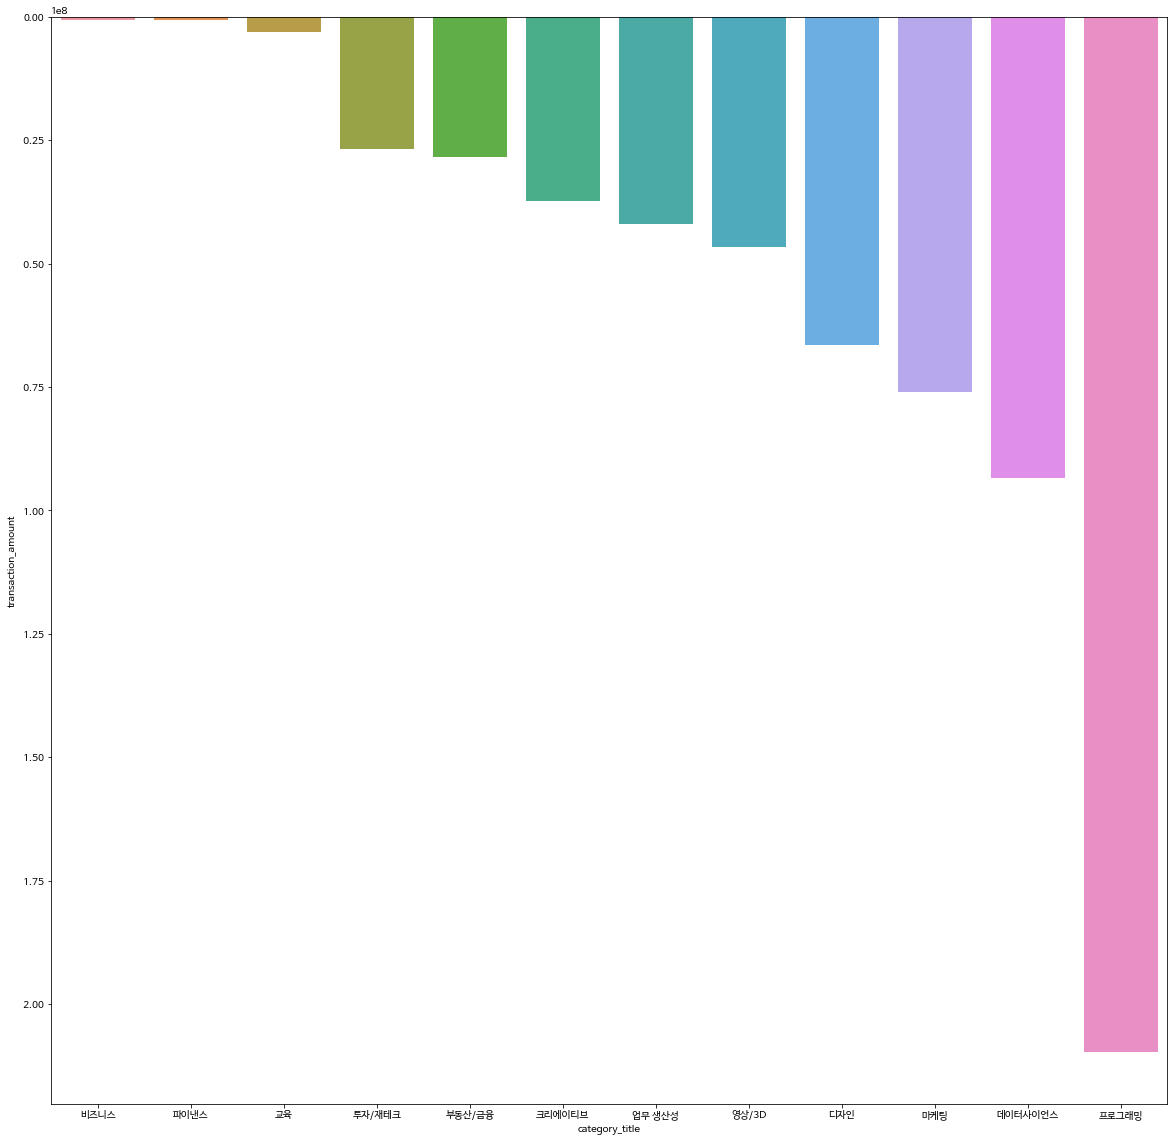

In [ ]:
plt.figure(figsize = (20,20))
sns.barplot(x='category_title', y='transaction_amount', data=df_total_refund)

## cancelled 된 카테고리 순
- 결제 취소된 원인 파악이 시급

In [ ]:
df_total_cancelled = df_cancelled[['category_title', 'transaction_amount']].groupby(['category_title'], as_index=False).sum().sort_values(by='transaction_amount', ascending=False)

In [ ]:
df_total_cancelled

,category_title,transaction_amount
15,프로그래밍,1757270423
3,데이터사이언스,1107113125
4,디자인,667121410
5,마케팅,597333620
8,업무 생산성,524203465
12,크리에이티브,472480400
9,영상/3D,463843275
6,부동산/금융,397011775
13,투자/재테크,154778425
1,교육,96107045


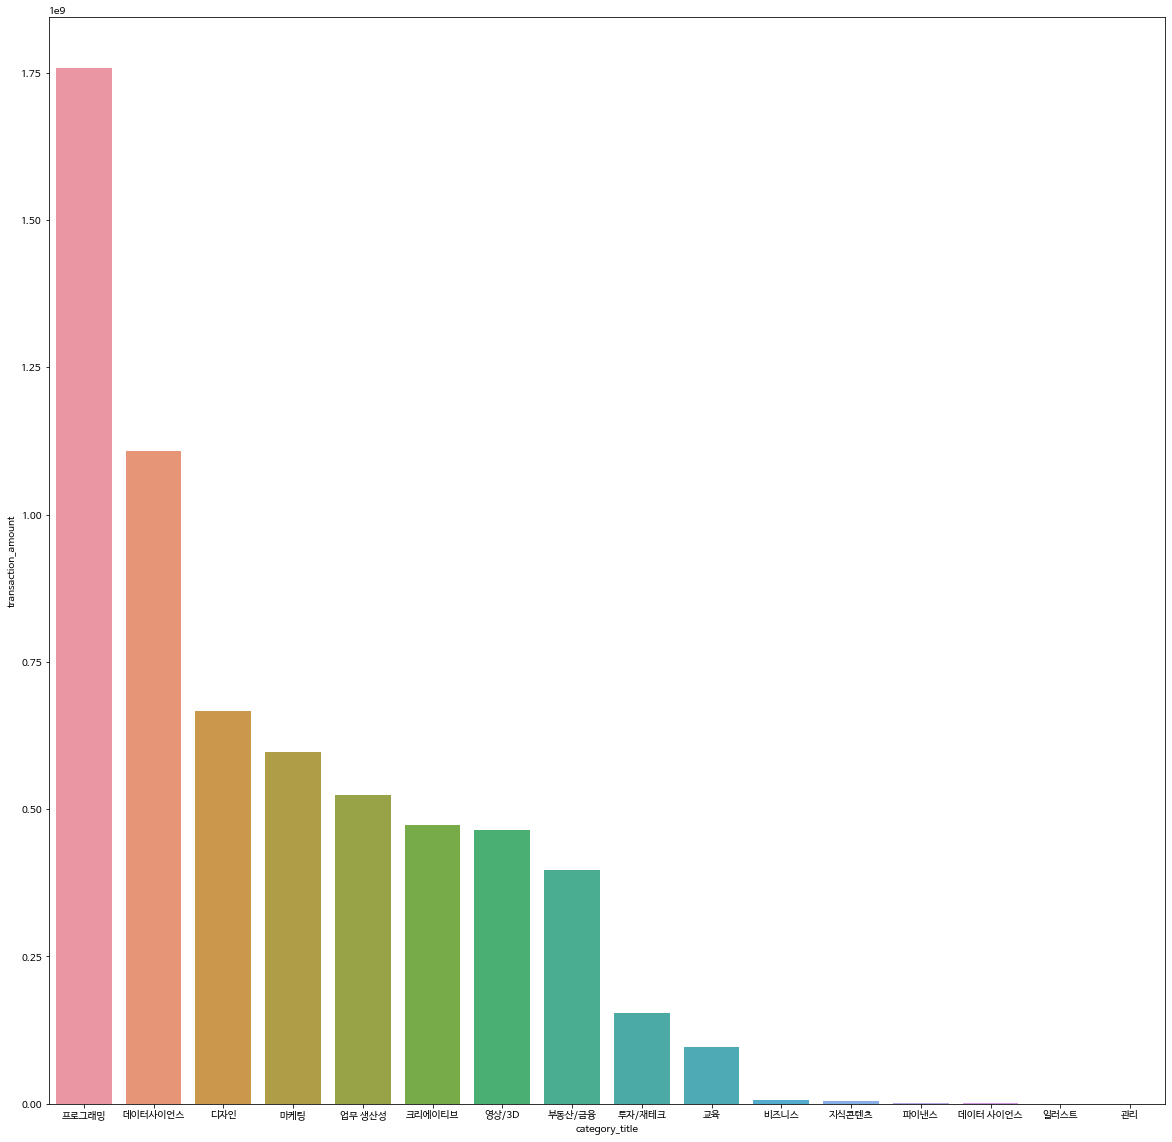

In [ ]:
plt.figure(figsize = (20,20))
sns.barplot(x='category_title', y='transaction_amount', data=df_total_cancelled)

In [ ]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,month
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,3.0
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,3.0
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,NaN
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,3.0
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,NaN


In [ ]:
df_cancelled.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount,month
count,4.127900e+04,41279.000000,38704.000000,4.127900e+04,7549.000000,4.127900e+04,4.127900e+04,0.0
mean,1.114135e+06,413873.750067,203683.058650,1.516117e+05,34805.772288,1.671480e+05,1.631368e+05,NaN
std,1.043874e+05,197641.456749,1316.218046,5.588669e+05,36297.694418,5.586910e+05,5.538747e+05,NaN
min,5.679930e+05,16.000000,200260.000000,2.000000e+02,0.000000,1.000000e+03,0.000000e+00,NaN
25%,1.031646e+06,275588.500000,202927.000000,9.100000e+04,20000.000000,1.090000e+05,1.090000e+05,NaN
50%,1.093865e+06,495980.000000,203720.000000,1.165000e+05,20000.000000,1.265000e+05,1.260000e+05,NaN
75%,1.165011e+06,546226.000000,204450.000000,1.590000e+05,30000.000000,1.710000e+05,1.710000e+05,NaN
max,1.365005e+06,670896.000000,207729.000000,9.094000e+07,1000000.000000,9.094000e+07,9.094000e+07,NaN


## 기회 손실

In [ ]:
df_pay['transaction_amount'].sum() # 수익

10299027142

In [ ]:
df_cancelled['transaction_amount'].sum() # cancelled 된 금액

NameError: ignored

In [ ]:
df_cancelled['transaction_amount'].sum() / df_pay['transaction_amount'].sum() # 수익에 60%정도 되는 금액을 놓치고 있음, 상당히 높은 수준의 기회 손실.

0.6076672322260397

In [ ]:
df_refund['transaction_amount'].sum() # 환불 금액

-631525955

In [ ]:
-df_refund['transaction_amount'].sum() / df_pay['transaction_amount'].sum() # 수익에 6%정도의 금액이 환불 되었음. 작은 돈도 놓치지않고 원인을 파악하여 보완해야 서비스의 질을 높일 수 있고 그로인하여 고객들에게 더 높은 신뢰를 줄 수 있음

NameError: ignored

## 결제수단
- 카드 결제가 많으므로 카드결제의 편의성을 더 높여주면 좋을 것으로 사료 됨.

In [ ]:
df['method'].value_counts()

CARD            66380
VBANK            8540
POINT            8084
PROMOTION        4733
TRANS            2732
TRANSFER         1247
ONSITE            599
VOUCHER             5
B2B_CONTRACT        3
Name: method, dtype: int64

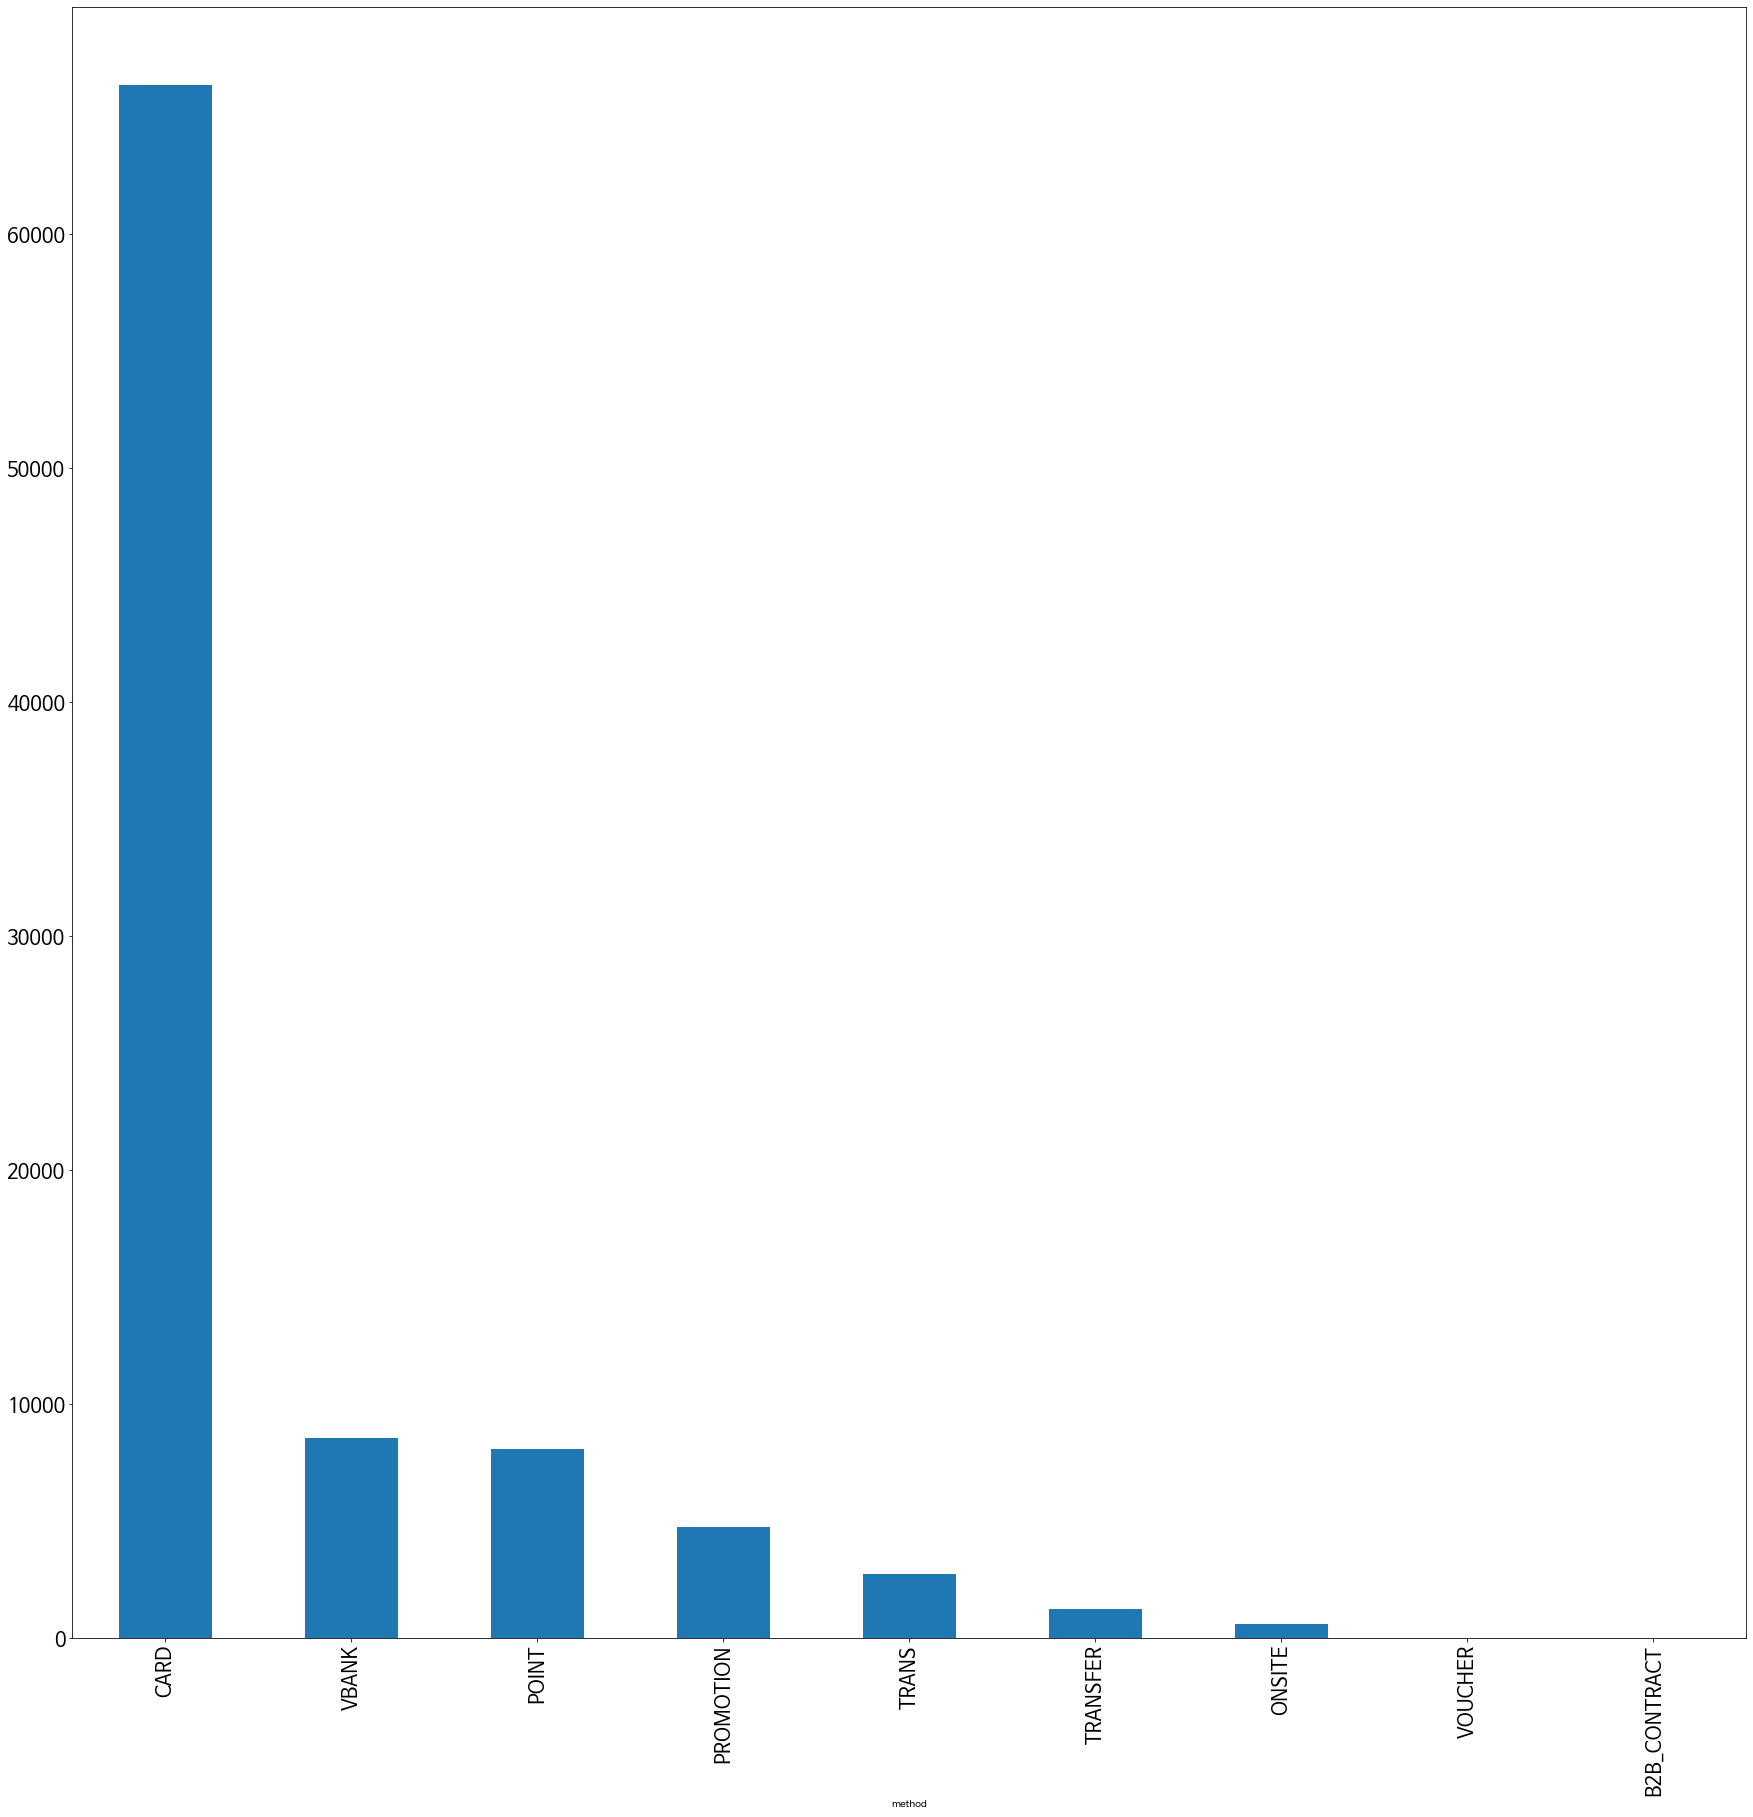

In [ ]:
df_method=df.groupby('method')['method'].count().sort_values(ascending=False)
df_method.plot.bar(figsize=(30,30), fontsize=20)

## cancelled된 결제 수단 목록

In [ ]:
df_cancelled['method'].value_counts()

CARD     25017
VBANK     3721
TRANS     2018
Name: method, dtype: int64

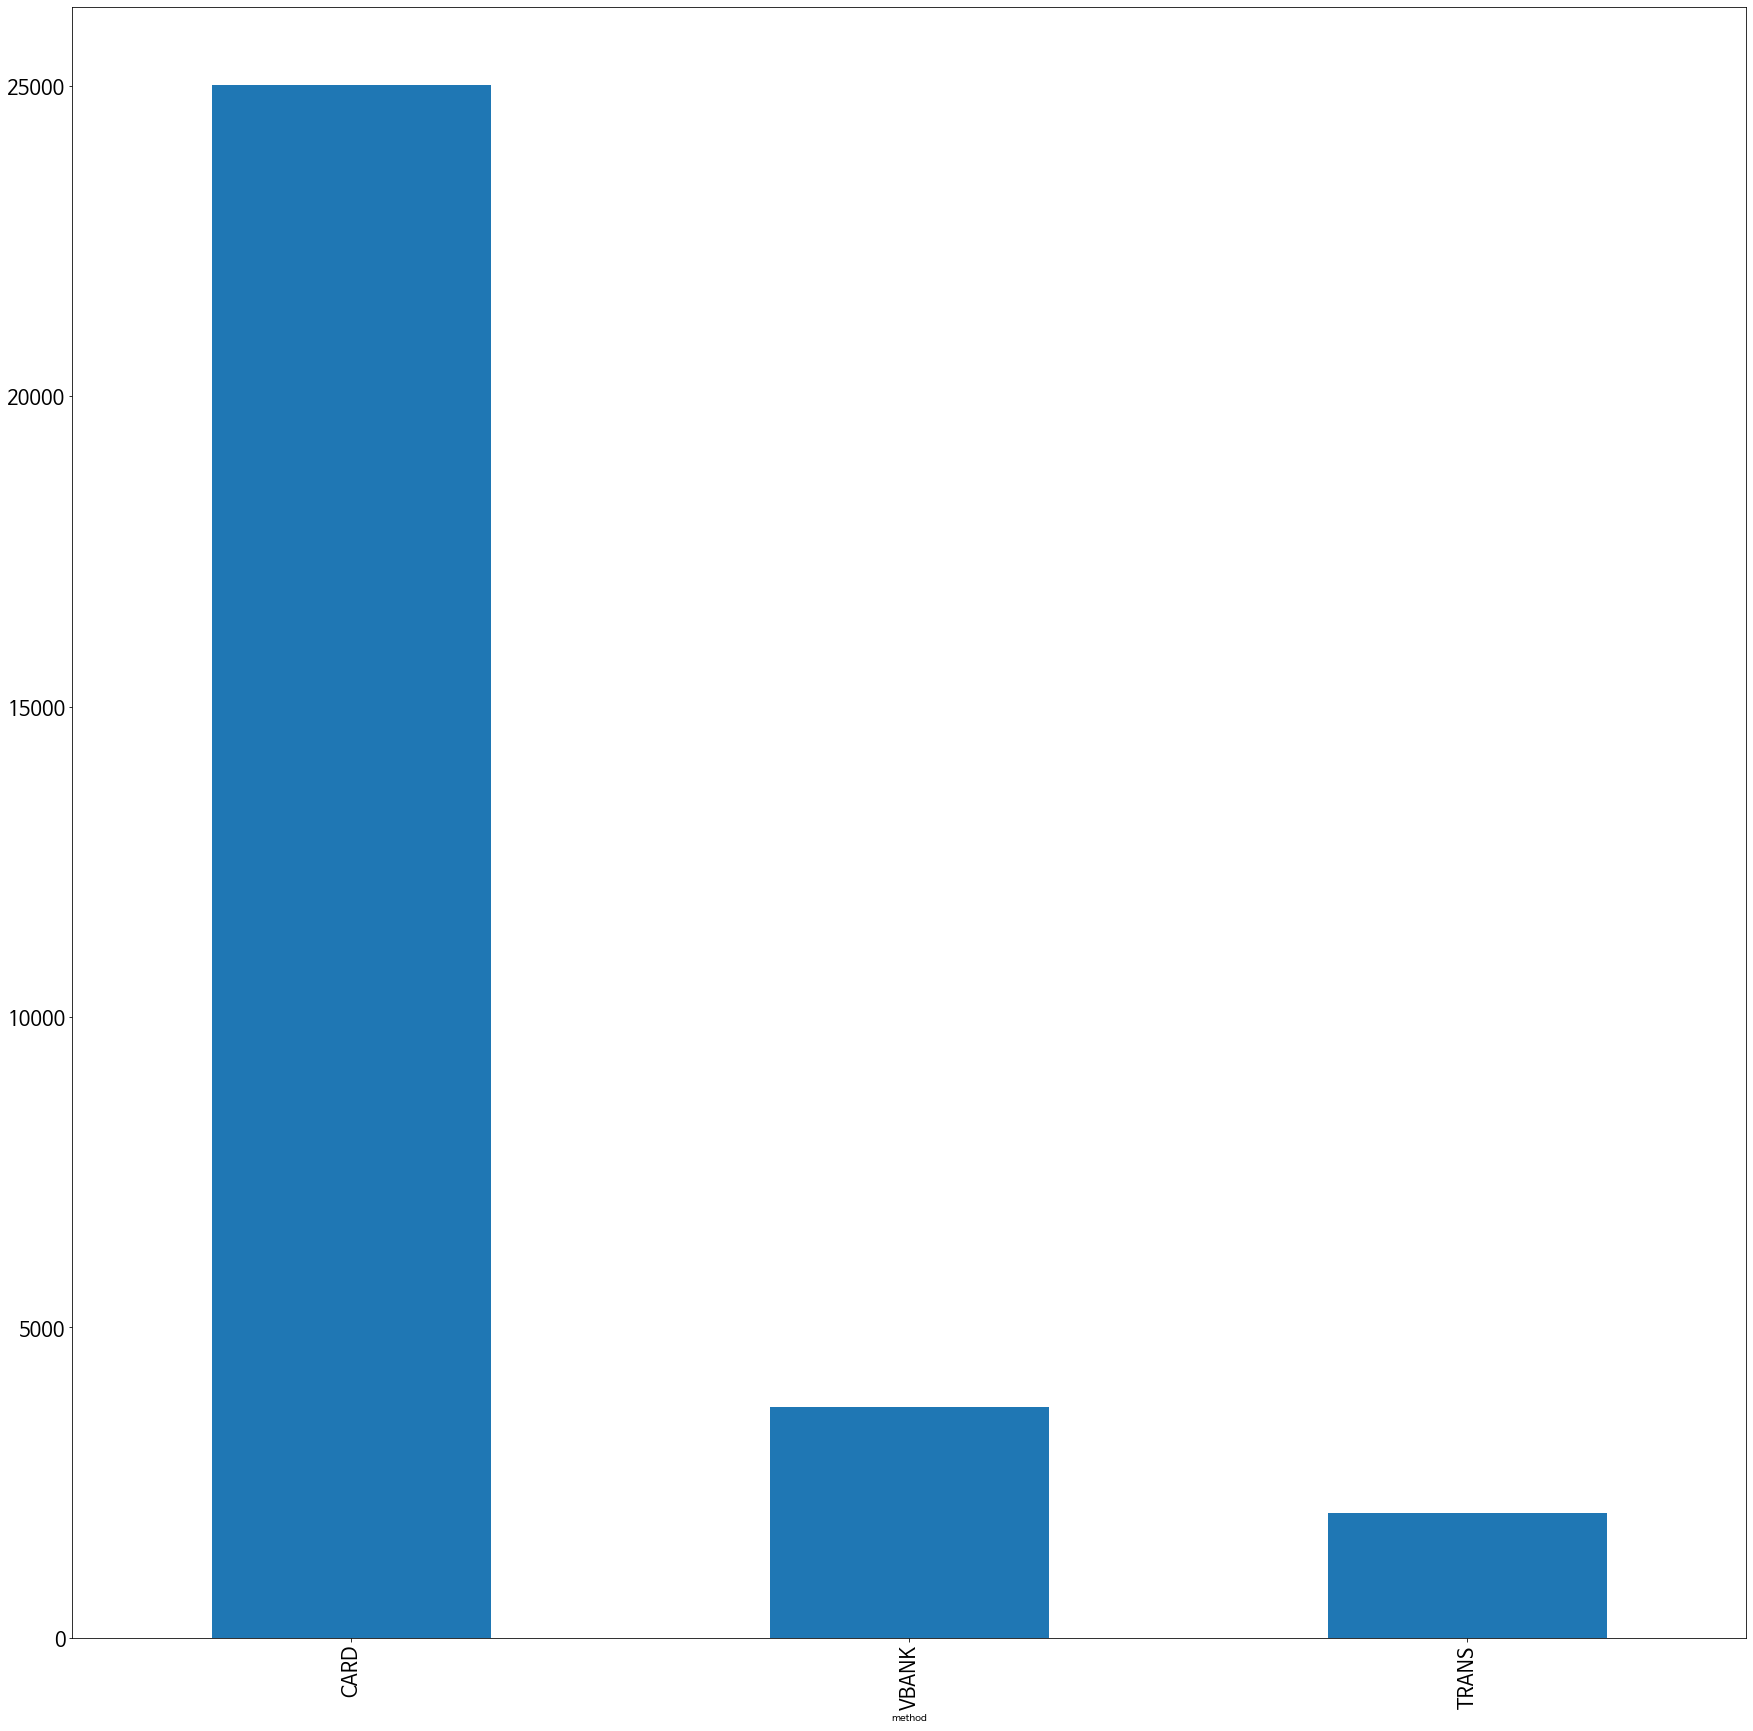

In [ ]:
df__cancelled=df_cancelled.groupby('method')['method'].count().sort_values(ascending=False)
df__cancelled.plot.bar(figsize=(30,30), fontsize=20)

## 환불 된 결제 수단 목록

In [ ]:
df_refund['method'].value_counts()

CARD         2964
POINT         561
VBANK         216
TRANS          46
TRANSFER       22
PROMOTION      13
ONSITE          2
Name: method, dtype: int64

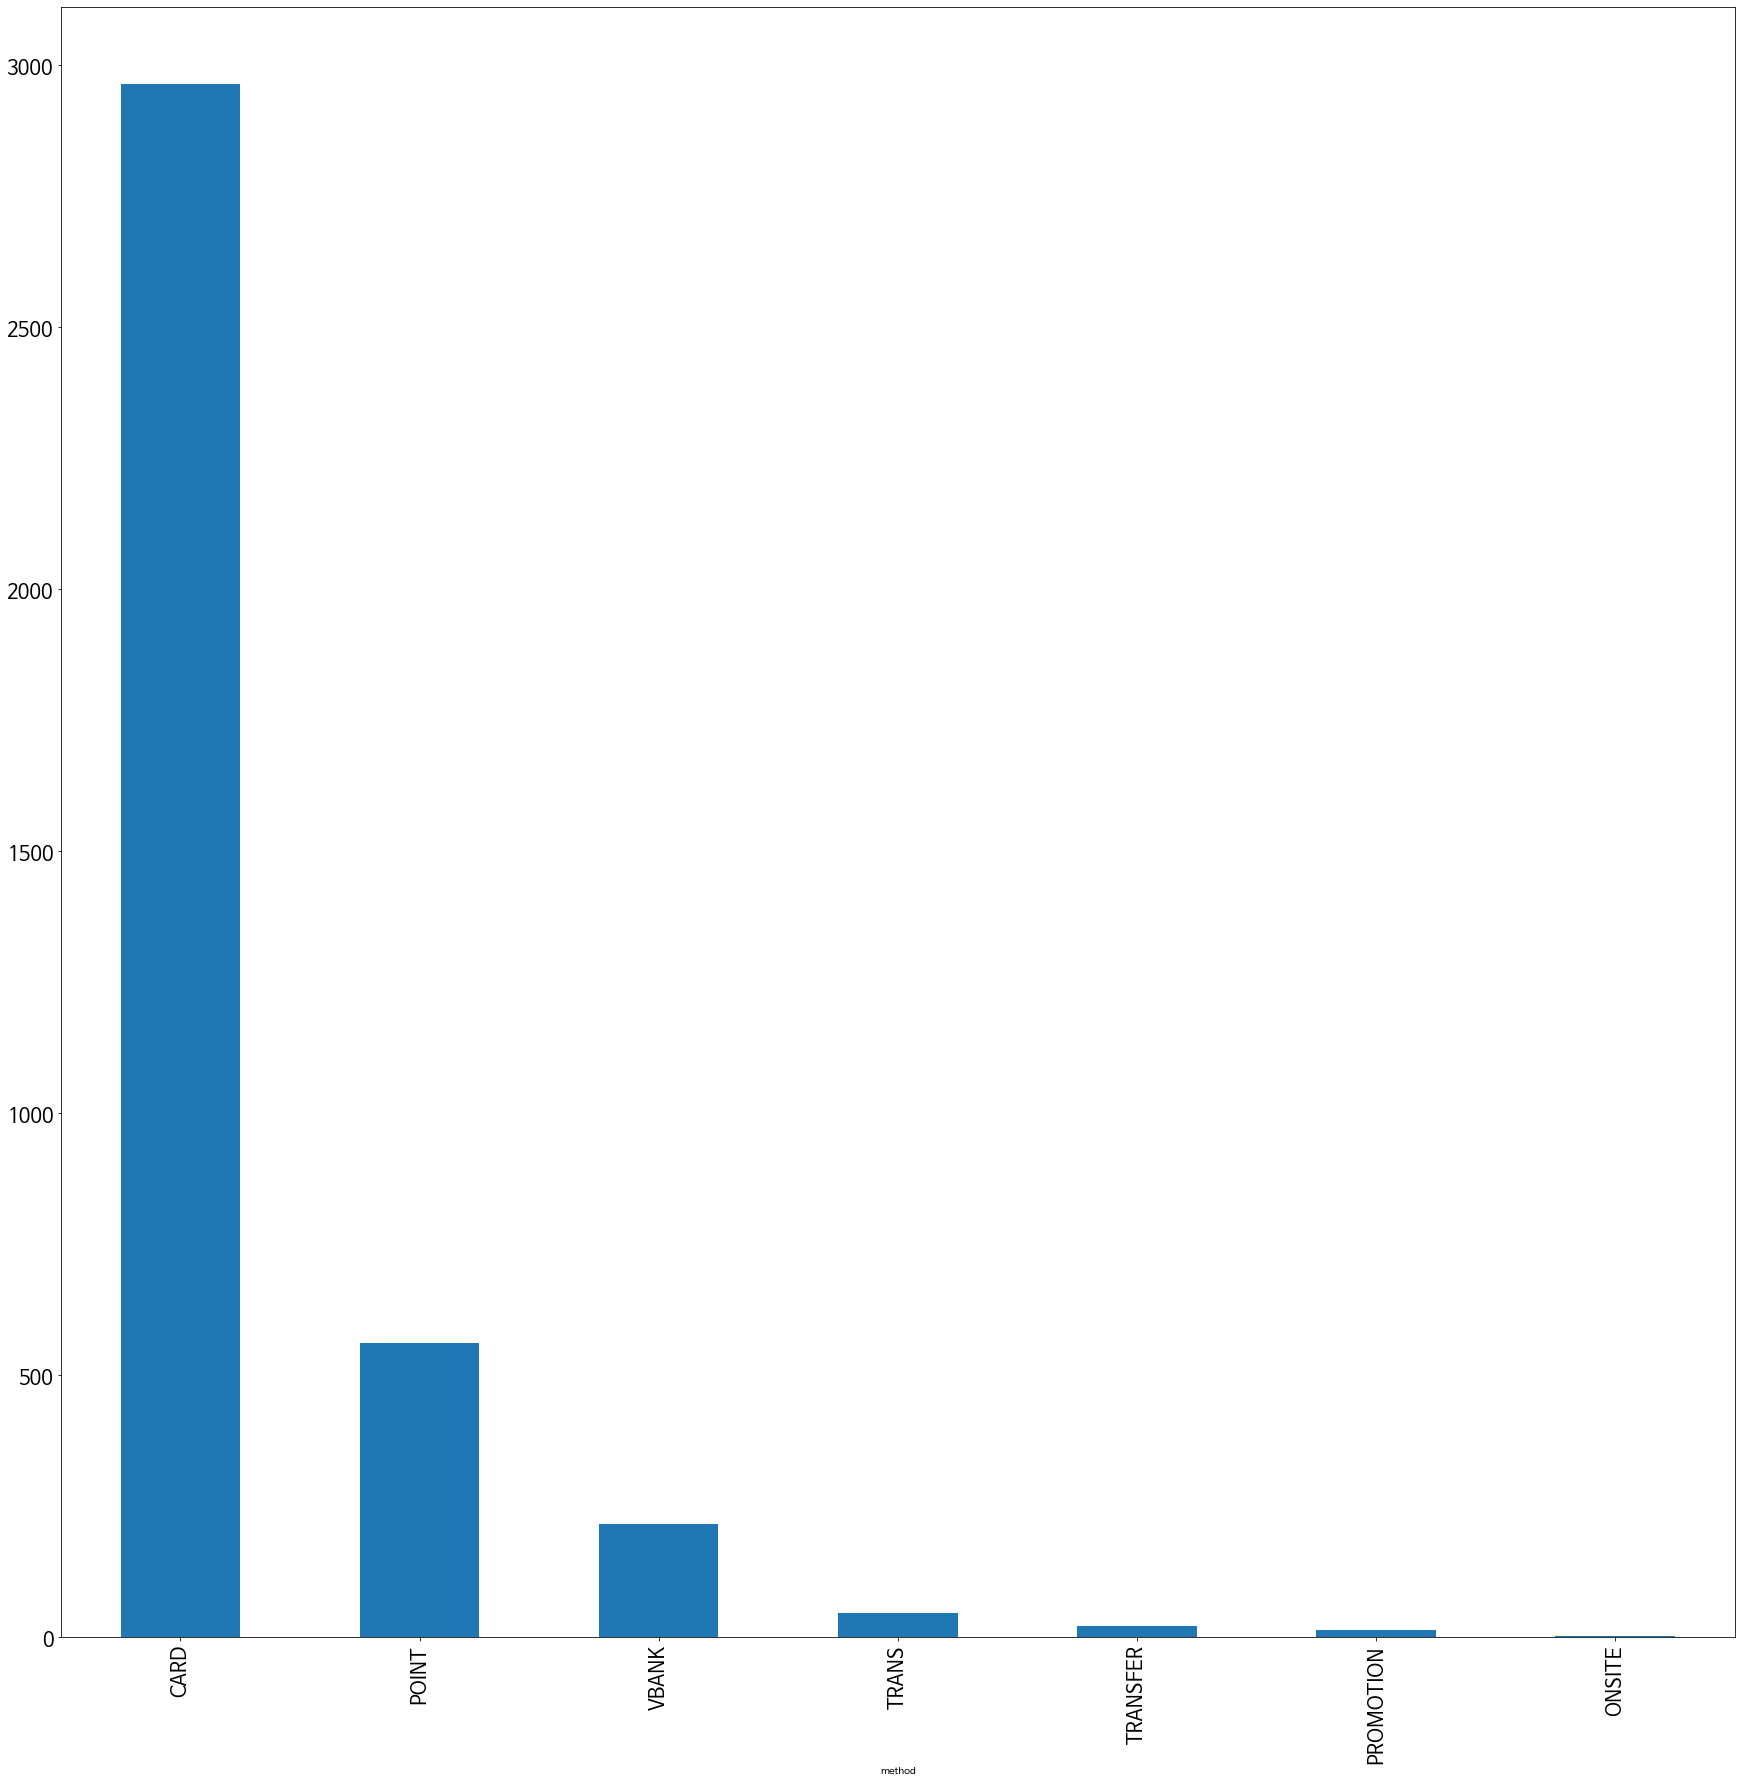

In [ ]:
df__refund=df_refund.groupby('method')['method'].count().sort_values(ascending=False)
df__refund.plot.bar(figsize=(30,30), fontsize=20)

## 쿠폰을 사용 한 사람과 안 한 사람의 취소율 차이

In [ ]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,month
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,3.0
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,3.0
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,NaN
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,3.0
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,NaN


In [ ]:
df_cancelled.dropna(subset=['coupon_title'])

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,month
15,970673,478035.0,203720.0,ORDER,CANCELLED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:02,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02,NaN
30,970712,478050.0,200543.0,ORDER,CANCELLED,올인원 패키지 : 프론트엔드 (React),프로그래밍,올인원,2021-03-28 15:58:50,120500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,140500.0,140500.0,NaN,CARD,NaN,2019-04-19,NaN
38,970727,474083.0,203782.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,올인원,2021-03-28 16:15:28,119000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,139000.0,139000.0,NaN,CARD,모션그래픽,2021-01-22,NaN
39,970729,474083.0,203782.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,올인원,2021-03-28 16:15:45,119000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,139000.0,139000.0,NaN,TRANS,모션그래픽,2021-01-22,NaN
42,970731,474083.0,203782.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,올인원,2021-03-28 16:15:54,119000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,139000.0,139000.0,NaN,CARD,모션그래픽,2021-01-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105388,1364845,670667.0,204871.0,PAYMENT,CANCELLED,올인원 패키지 : star741의 캐주얼 일러스트 드로잉,디자인,올인원,2021-09-25 10:57:59,149000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,169000.0,169000.0,INICIS,CARD,일러스트,2021-05-25,NaN
105396,1364879,623392.0,206060.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화,프로그래밍,올인원,2021-09-25 11:38:53,173000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,203000.0,203000.0,KAKAO,NaN,개발자 커리어,2021-07-16,NaN
105404,1364920,670837.0,201582.0,PAYMENT,CANCELLED,올인원 패키지 : 컴퓨터 공학 전공 필수,프로그래밍,올인원,2021-09-25 12:11:49,169000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,189000.0,189000.0,INICIS,CARD,개발자 커리어,2019-09-30,NaN
105409,1364960,670874.0,204342.0,PAYMENT,CANCELLED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-09-25 13:28:42,139000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,159000.0,159000.0,INICIS,CARD,데이터마케팅,2021-04-02,NaN


In [ ]:
df_pay.dropna(subset=['coupon_title'])

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
28,970704,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,99000.0,NaN,CARD,UX/UI,2021-03-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [ ]:
7549/(7549+27595) # 쿠폰을 사용한 사람들의 cancelled 비율

0.2148019576599135

In [ ]:
df_cancelled

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,month
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,NaN
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,NaN
5,970655,478028.0,201797.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,NaN,NaN,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,NaN
6,970614,477910.0,NaN,ORDER,CANCELLED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 15:22:36,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105409,1364960,670874.0,204342.0,PAYMENT,CANCELLED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-09-25 13:28:42,139000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,159000.0,159000.0,INICIS,CARD,데이터마케팅,2021-04-02,NaN
105410,1364965,144883.0,NaN,PAYMENT,CANCELLED,프로모션 : 풀스택 개발자 맥북 pro 패스(9월 현물 프리패스),프로그래밍,올인원,2021-09-25 13:34:41,1800000,NaN,NaN,1800000.0,295200.0,INICIS,CARD,NaN,NaT,NaN
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15,NaN
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10,NaN


In [ ]:
df_pay

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [ ]:
(41279-7549) / ((41279-7549)+(61433-27595)) # 쿠폰을 사용하지 않은 사람들의 cancelled 비율

0.49920080511484727

In [ ]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,month
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT,3.0
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02,3.0
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,NaN
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04,3.0
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15,9.0
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10,9.0
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15,NaN
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10,9.0


In [ ]:
41279 / 105419 # 전체 cancelled 비율

0.391570779461008

- 쿠폰을 사용한 사람들의 취소율 = 0.2148
- 쿠폰을 사용하지 않은 사람들의 취소율 = 0.4992
- 전체 취소율 = 0.3915
- - 오류등으로 인한 중복 값으로 인해 약 5%내외의 오차가 있을 수 있습니다.
- cancelled를 막기위해서 쿠폰을 많이 뿌리는 것도 한 가지 방법이 될 수 있을 것으로 사료됨
- 2번의 신청 절차로인한여 불편함과 주저함등이 생겨 중간에 결제를 취소하는 것이 아닌가하는 추론
- - 이를 보완하기 위하여 신청 절차를 1번으로 줄여 기회 손실을 막을 수 있을 가능성이 있다고 판단 됨
- 6월 부터 광고를 많이 하고 쿠폰을 많이 뿌리며 만족도가 높은 강의들을 노출시킴으로서 많은 고객을 끌어들여 높은 수익을 낼 수 있을 것이라는 가설.

In [ ]:
a = df_pay[df]